In [191]:
import math
import pandas as pd
from langdetect import detect
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt

In [206]:
df = pd.read_csv('/Users/shirinharandi/Downloads/MAIN.csv')

In [207]:
df

,word,old_frequency,new_frequency,old_sum_count,new_sum_count,city,Ofrequency,Nfrequency,freq,gain,licia_gain,cat
0,punctuality,1.386294,1.386294,426329.038844,1.389642e+06,buenos_aires,0.000003,9.975910e-07,2.124646e-06,0.306791,1.000000,business
1,punctuality,0.693147,0.000000,462327.771895,7.815908e+05,rio,0.000001,0.000000e+00,7.496275e-07,0.000000,0.000000,business
2,email,27.843670,280.973725,84514.056407,2.853027e+06,tokyo,0.000329,9.848269e-05,2.139694e-04,0.298925,10.091117,business
3,email,13.862944,85.728235,43668.014643,7.311018e+05,belize,0.000317,1.172590e-04,2.173606e-04,0.369364,6.183985,business
4,email,61.807882,64.292789,87073.800648,6.873788e+05,santiago,0.000710,9.353328e-05,4.016833e-04,0.131768,1.040204,business
...,...,...,...,...,...,...,...,...,...,...,...,...
365,response,0.693147,200.842783,38248.136582,3.599748e+05,beijing,0.000018,5.579356e-04,2.880290e-04,30.787109,289.754888,business
366,response,66.542129,1308.217847,275248.116448,1.793143e+06,hong_kong,0.000242,7.295671e-04,4.856602e-04,3.017817,19.659994,business
367,response,11.090355,913.581535,183693.466622,3.037567e+06,mexico_city,0.000060,3.007609e-04,1.805676e-04,4.981610,82.376222,business
368,response,59.610658,351.831086,426329.038844,1.389642e+06,buenos_aires,0.000140,2.531811e-04,1.965021e-04,1.810724,5.902151,business


In [208]:
df = df[df['gain'] < 8 ]

In [209]:
def get_log(fu):
    if fu < 3:
        return fu
    return (math.log(fu, 2))
df['gain'] = df['gain'].apply(lambda x: get_log(x))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


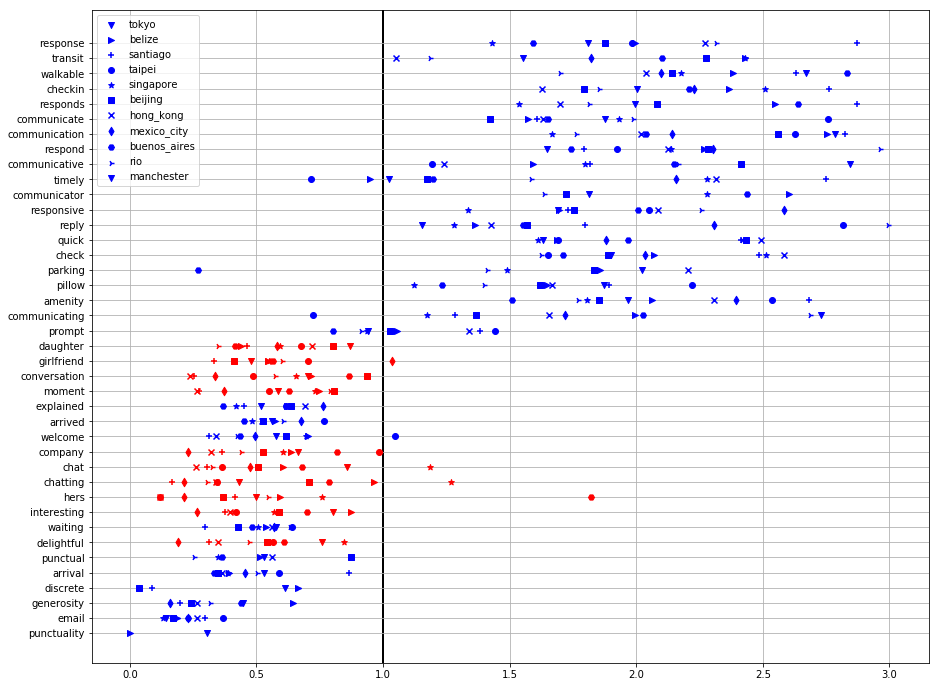

In [210]:
cities = ["tokyo", "belize", "santiago", "taipei", "singapore", "beijing", "hong_kong", "mexico_city", "buenos_aires", "rio", "manchester"]
plt.figure(figsize=(15,12))

# plt.gca().set_xticks(np.arange(0,14,1),minor=True)
# plt.grid(True, which = 'both', zorder = 0)
# plt.rc('axes', axisbelow=True)
# plt.grid()
# plt.set_axisbelow(True)

markers = ["+","o", "*", "s", "x", "d", "H", "4", "v", ">", "v"]
colours = ["blue", "red"]

for w in df.word.unique() :
    j = 0
    tf = df[df['word'] == w]
    if tf.cat.unique()[0] == "social":
        j = 1
    for cit  in tf.city.unique():
        sf = tf[tf['city'] == cit]
        plt.scatter(sf['gain'], sf['word'], c = colours[j], marker = markers[cities.index(cit)]);

plt.legend(cities)
ax = plt.axes()
ax.grid()
ax.set_axisbelow(True)
a = ax.get_xgridlines()
b = a[3]
b.set_color('black')
b.set_linewidth(2)

plt.show()
# plt.figure()